In [1]:
# Import the libraries and functions
from functions import *

## 1. Overview

In [2]:
# Set the maximum width of the columns
pd.set_option('display.max_colwidth', 20)

In [3]:
# Load a dataframe of the disordered regions
disordered = pd.read_csv('disordered_df.csv')
print(f'The number of rows with the disordered regions: {len(disordered)}')
disordered.head()

The number of rows with the disordered regions: 7393


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GA...,MAESPTEEAATA GA...,MAESPTEEAATATAGA...,1,354,1,354,350,350,4,0.0,1851.0,200
1,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GA...,MAESPTEEAATA GA...,MAESPTEEAATATAGA...,1,354,1,354,350,350,4,0.0,1851.0,200
2,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GA...,MAESPTEEAATA GA...,MAESPTEEAATATAGA...,1,354,1,354,350,350,4,0.0,1851.0,200
3,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----...,MAESPTEEAATA ...,MAESPTEEAATATATA...,1,354,1,356,351,351,6,0.0,1854.0,200
4,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----...,MAESPTEEAATA ...,MAESPTEEAATATATA...,1,354,1,356,351,351,6,0.0,1854.0,200


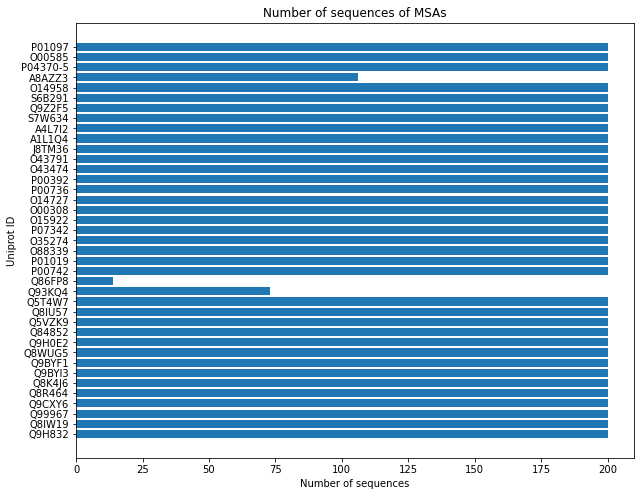

In [4]:
# Plot the number of sequences in each MSA
figure(figsize=(10, 8))
plt.barh(disordered['query_id'], disordered['count'])
plt.xlabel('Number of sequences')
plt.ylabel('Uniprot ID')
plt.title('Number of sequences of MSAs')
plt.show()

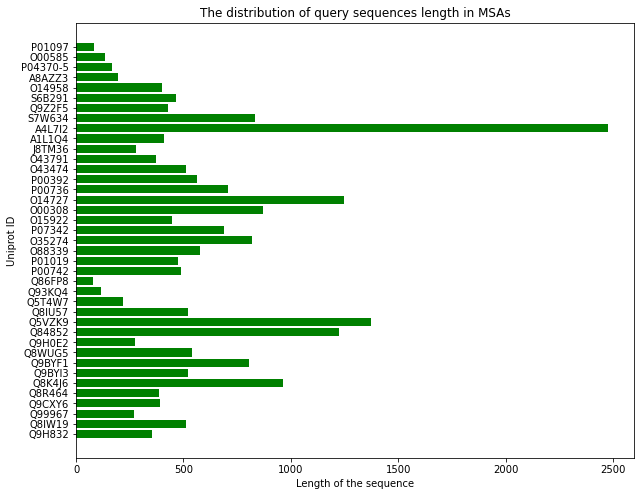

In [5]:
# Plot the length of sequences in the MSAs
figure(figsize=(10, 8))
plt.barh(disordered['query_id'], disordered['query_len'], color='green')
plt.xlabel('Length of the sequence')
plt.ylabel('Uniprot ID')
plt.title('The distribution of query sequences length in MSAs')
plt.show()

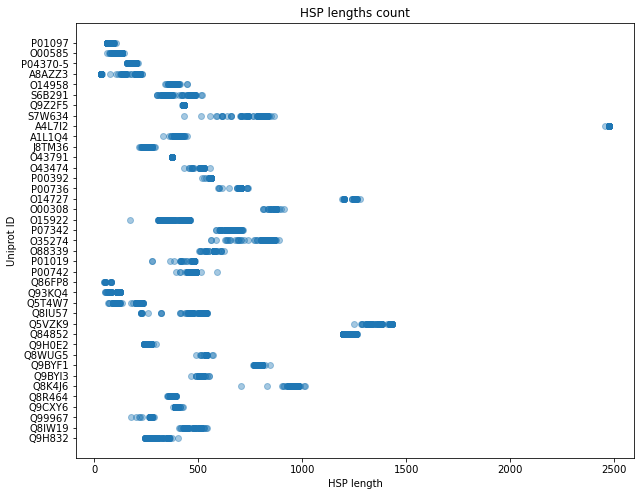

In [6]:
# Plot HSP length count
figure(figsize=(10, 8))
plt.scatter(disordered['hsp_len'], disordered['query_id'], alpha=0.4)
plt.xlabel('HSP length')
plt.ylabel('Uniprot ID')
plt.title('HSP lengths count')
plt.show()

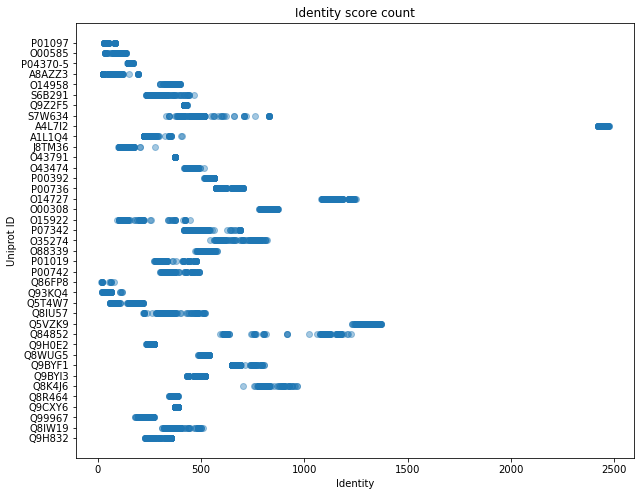

In [7]:
# Plot identity score count
figure(figsize=(10, 8))
plt.scatter(disordered['identity'], disordered['query_id'], alpha=0.4)
plt.xlabel('Identity')
plt.ylabel('Uniprot ID')
plt.title('Identity score count')
plt.show()

In [8]:
# Load the curated_disprot dataframe
curated_disprot = pd.read_csv('curated_disprot.csv')

# Extract the disordered regions IDs and positions
dis_regs = set()

for i, row in disordered.iterrows():
    dis_id = row[0]
    matching_row = curated_disprot[curated_disprot['acc'] == dis_id]
    if not matching_row.empty:
        region = matching_row['region']
        dis_regs.update(region)

print(f'The number of disordered regions in the database: {len(dis_regs)}')

# Define an array of disordered regions ids
disprot_ids = dis_regs

# Dropdown list of Uniprot query IDs for disordered regions
output = widgets.Select(options=disprot_ids,
    rows=10,
    description='Uniprot ID: ',
    layout={'width': 'max-content'},
    disabled=False)

display(output)

The number of disordered regions in the database: 53


Select(description='Uniprot ID: ', layout=Layout(width='max-content'), options=('S6B291_240-465', 'Q9CXY6_29-4…

In [9]:
# Save the data for building MSA of the disordered regions
id_dis = output.value # the Uniprot ID + start and end positions
id_split = id_dis.split('_')[0] # the Uniprot ID

# selected_dis = disordered[disordered['query_id'].isin([id_dis.split('_')[0]])] # the information for one query ID
# print(f'The number of sequences for the MSA of the {id_split} protein: {len(selected_dis)}')
# selected_dis.head()

In [ ]:
# Filter the curated_disprot dataframe based on selected ID
# curated_query = curated_disprot[curated_disprot['region'] == id_dis]
# curated_query

### 2. Query ID Analysis

Next, we determine the count of subject IDs for each query ID. It's important to note that we need to summarize the data for all subject IDs that occurred for a particular query, rather than for each individual 'query-sequence' pair.

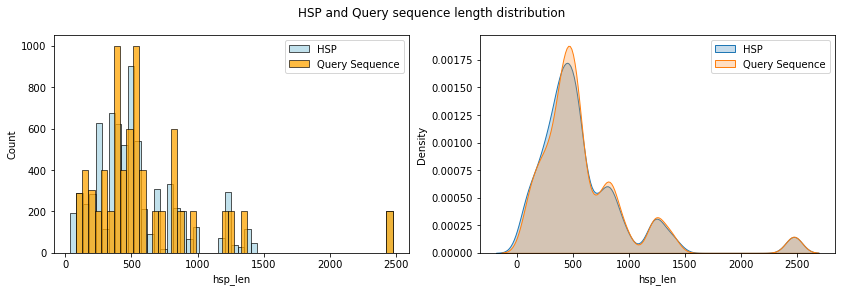

In [10]:
# Create bar plot for HSP hits - overall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(disordered['hsp_len'], kde = False, bins = 50, color = 'lightblue', ax = ax1, label='HSP')
sns.histplot(disordered['query_len'], kde = False, bins = 50, color = 'orange', ax = ax1, label='Query Sequence')
sns.kdeplot(disordered['hsp_len'], shade = True, ax = ax2, label='HSP')
sns.kdeplot(disordered['query_len'], shade = True, ax = ax2, label='Query Sequence')
ax1.legend()
ax2.legend()
plt.suptitle(f'HSP and Query sequence length distribution')
plt.show()

The `histplot` shows the distribution of HSP lengths in the selected query ID by grouping the HSP lengths into bins or ranges along the x-axis and displaying the frequency of HSP lengths as the height of the corresponding bar on the y-axis.

The height of the `kdeplot` curve represents the estimated probability density of the variable being plotted at each point on the x-axis. For example, in the case of the HSP length, the height of the curve at a particular value of x represents the estimated density of observations around that value. The area under the curve represents the total probability of all possible values of the variable, which is equal to 1.

The `violinplot` provides the information about the interquartile range (thick gray line), median that is represented by a white dot and the rest of a distribution (thin gray line). The distribution's shape is presented on either side of the gray line through kernel density estimation. The wider sections of the violin plot represent a greater probability of the population taking on a specific value, while the narrower sections indicate a lower probability.

In [11]:
# # Create bar plot for HSP hits - for one ID
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
# sns.histplot(selected_dis['hsp_len'], kde = True, bins = 50, ax = ax1)
# sns.kdeplot(selected_dis['hsp_len'], shade = True, ax = ax2)
# sns.violinplot(x = selected_dis['hsp_len'], ax = ax3)
# plt.suptitle(f'HSP distribution for the {id_split} query ID')
# plt.show()

## 3. Multiple Sequence Alignment

Within this framework, we will compare the MSA results obtained directly from the BLAST output with those generated from the ClustalOmega service.

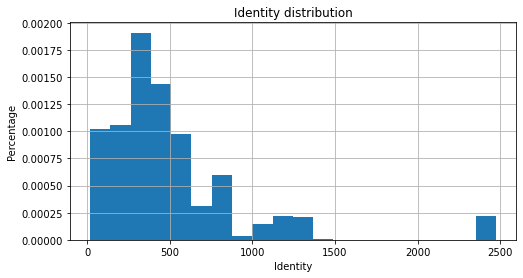

In [12]:
# Plot identity distribution
figure(figsize=(8, 4))
plt.hist(disordered['identity'], bins=20, density=True)  # Set density=True for percentage values
plt.xlabel('Identity')
plt.ylabel('Percentage')
plt.grid(True)
plt.title(f'Identity distribution')
plt.show()

In [13]:
# # Import numpy arrays of MSAs from BLAST, ClustalOmega and MAFFT
# %store -r blast_seqs 
# # clustal_seqs mafft_seqs
# # The number of sequences may differ
# blast_seqs.shape, # clustal_seqs.shape, mafft_seqs.shape

### Removing redundant regions

For this step we use the input files for ClustalOmega or MAFFT alignment. The goal is to keep only non-redundant regions. We set the threshold for redundancy of 62%. The program implementing the task is called `cd-hit`.

Next, we will be working with the newly generated file. It will be uploaded to ebi website, where we will select Pearson/FASTA as the output format. Once we have downloaded the aligned sequences, we can analyze the alignment using Jalview.

In [14]:
# # Create a dataframe with the calculated redundancy
# redundancy_df = pd.read_csv('nr_75.csv', sep=';')
# redundancy_df.head()

In [15]:
# # Plot the redundancy distribution
# figure(figsize=(6, 4))
# plt.plot(redundancy_df['id'], redundancy_df['ratio'])
# plt.xlabel('Uniprot ID')
# plt.ylabel('Ratio')
# plt.xticks(rotation='vertical')
# plt.title('Distribution of redundancy of MSA')
# plt.show()

In [16]:
# # Plot the dendrogram
# %store -r data_file

# cluster_data = []
# with open(data_file, 'r') as file:
#     for line in file:
#         if line.startswith('>Cluster'):
#             continue
#         parts = line.strip().split('\t')
#         percentage_matches = re.findall(r'\d+\.\d+', parts[-1])
#         if percentage_matches:
#             percentage = float(percentage_matches[0])
#             cluster_data.append(percentage)

# # Convert the data into a matrix
# matrix_data = np.array(cluster_data).reshape(len(cluster_data), 1)

# # Create linkage matrix using the data and hierarchical clustering
# Z = linkage(matrix_data, method='average')

# # Plot the dendrogram
# plt.figure(figsize=(10, 6))
# dendrogram(Z, labels=np.arange(len(cluster_data)), leaf_rotation=90, leaf_font_size=8)

# # Add a horizontal line for the threshold
# threshold = 10.0
# plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold}%)')

# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel(f'Cluster Index for {id_split} protein')
# plt.ylabel('Distance')
# plt.show()

## 4. Analysing the quality of prediction

For calculation of the entropy we use a probability distribution with 20 outcomes, where each outcome has an equal probability of 1/20. Entropy is a measure of the uncertainty or randomness associated with a probability distribution. In this case, since the probability distribution is uniform, the entropy is maximized, meaning that there is maximum uncertainty or randomness associated with the outcomes.

With occupancy we define the proportion of non-missing (non-gap) values in the column.

### 4.1. Analysis of occupancy and entropy for initial MSA (redundant and non-redundant)

In [17]:
%store -r blast_stats clustal_stats

In [18]:
blast_stats.head()

,pos,query_id,occupancy,entropy,counts
0,0,P07342,1.0,0.186223,"[(M, 161), (L, 3..."
1,1,P07342,1.0,0.503015,"[(L, 83), (I, 42..."
2,2,P07342,1.0,0.051352,"[(R, 194), (S, 4..."
3,3,P07342,1.0,0.478341,"[(Q, 96), (R, 52..."
4,4,P07342,1.0,0.330804,"[(S, 148), (C, 1..."


In [19]:
clustal_stats.head()

,pos,query_id,occupancy,entropy,counts
0,0,P01097,0.958974,0.225640,"[(M, 161), (L, 6..."
1,1,P01097,0.969231,0.321571,"[(L, 141), (F, 2..."
2,2,P01097,0.943590,0.531230,"[(R, 89), (S, 30..."
3,3,P01097,0.969231,0.513721,"[(R, 81), (T, 46..."
4,4,P01097,0.969231,0.632326,"[(S, 68), (T, 41..."


In [20]:
# # Obtain the occupancy and entropy statistics for each type of MSA
# %store -r nr_seqs id_split
# nr_calc = stats_calculation(nr_seqs) # non-redundant MSA CLustalOmega
# blast_calc = stats_calculation(blast_seqs) # initial MSA BLAST

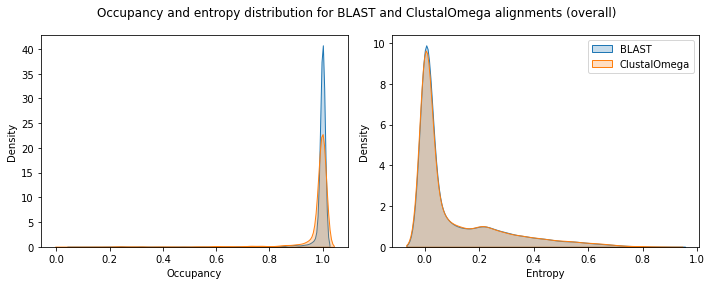

In [35]:
# KDE plot of occupancy/entropy
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(blast_stats['occupancy'], shade = True, ax = ax[0], label='BLAST')
sns.kdeplot(clustal_stats['occupancy'], shade = True, ax = ax[0], label='ClustalOmega')
sns.kdeplot(blast_stats['entropy'], shade = True, ax = ax[1], label='BLAST')
sns.kdeplot(clustal_stats['entropy'], shade = True, ax = ax[1], label='ClustalOmega')

# Add x-axis labels to all subplots
x_axis_labels = ['Occupancy', 'Entropy']
for i in range(2):
    ax[i].set_xlabel(x_axis_labels[i])

plt.legend()

plt.suptitle(f'Occupancy and entropy distribution for BLAST and ClustalOmega alignments (overall)')
plt.tight_layout()
plt.show()

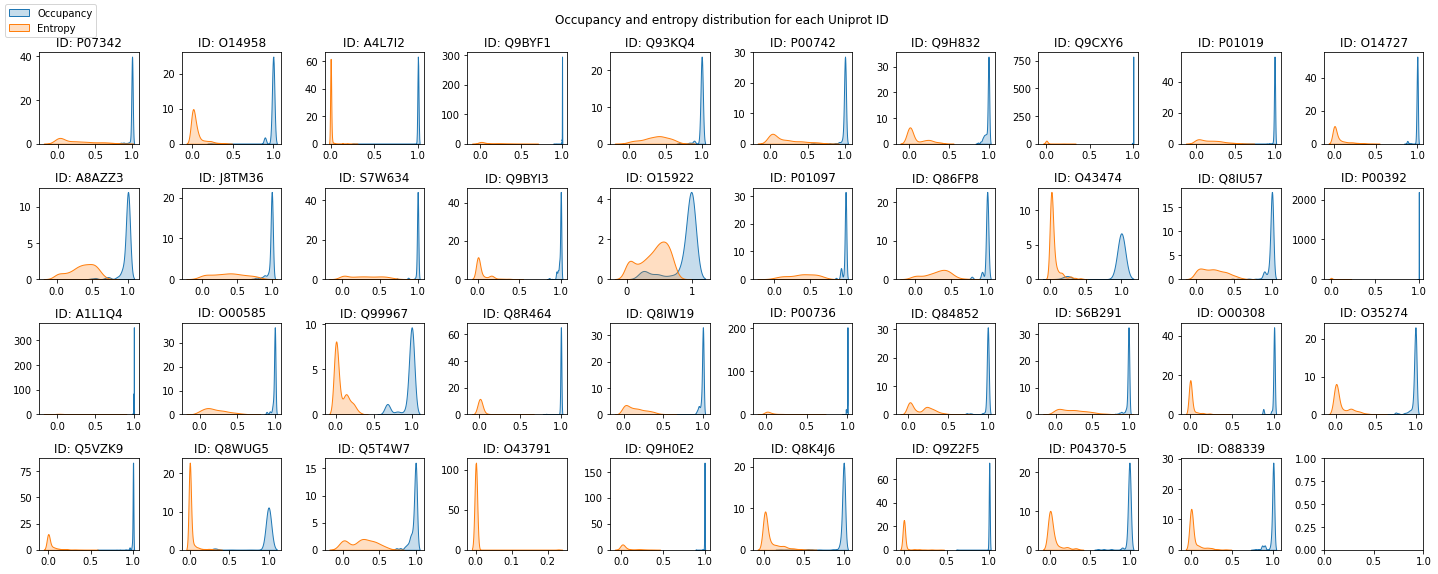

In [24]:
# Plot the statistics distribution for BLAST
plot_occupancy_entropy_distribution(blast_stats)

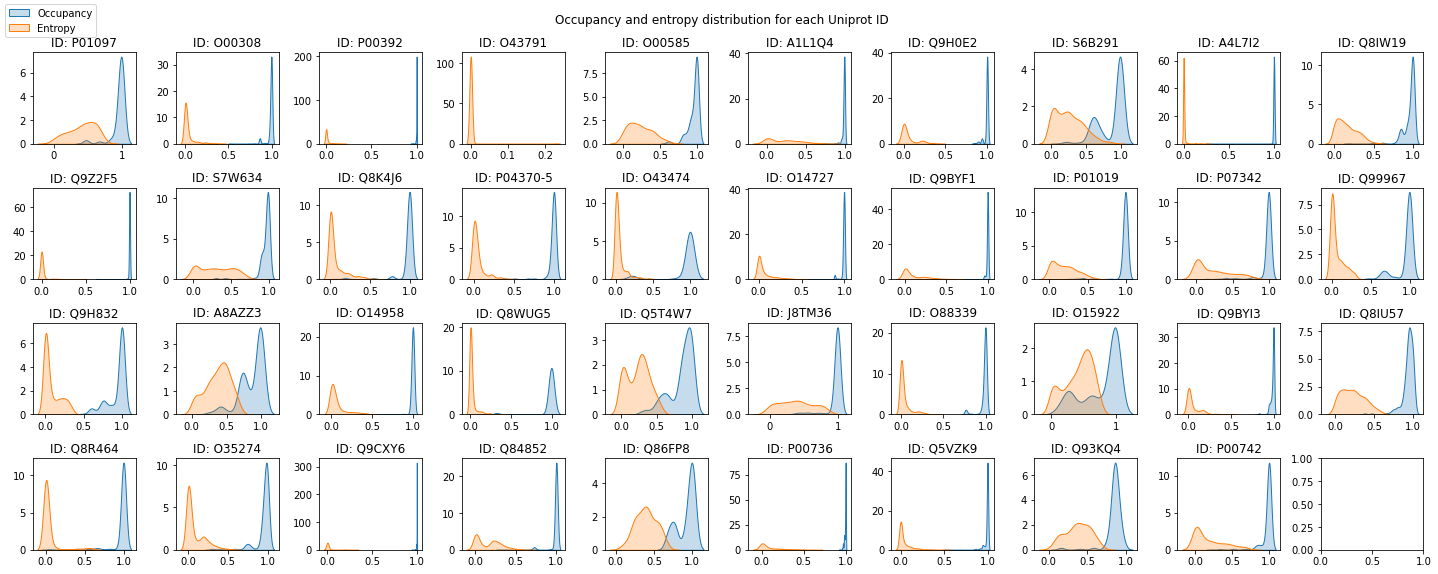

In [25]:
# Plot the statistics distribution for ClustalOmega
plot_occupancy_entropy_distribution(clustal_stats)

In [30]:
# # KDE plot of occupancy/entropy BLAST/ClustalOmega
# fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# sns.kdeplot(blast_stats['occupancy'], shade = True, ax = ax[0,0])
# sns.kdeplot(clustal_stats['occupancy'], shade = True, ax = ax[0,0])

# sns.kdeplot(blast_stats['entropy'], shade = True, ax = ax[0,1])
# sns.kdeplot(clustal_stats['entropy'], shade = True, ax = ax[0,1])

# # Histogram of occupancy/entropy redundant vs non-redundant
# ax[1,0].hist([blast_stats['occupancy'], clustal_stats['occupancy']])
# ax[1,1].hist([blast_stats['entropy'], clustal_stats['entropy']])

# # Add x-axis labels to all subplots
# x_axis_labels = ['Occupancy', 'Entropy']
# for i in range(2):
#     for j in range(2):
#         ax[i, j].set_xlabel(x_axis_labels[j])

# # Add the common legend (assuming you have already done this)
# legend_labels = [f'BLAST', 
#                  f'ClustalOmega']

# for ax in ax.flat:
#     ax.legend(legend_labels)

# plt.suptitle(f'KDE plot and histogram of occupancy and entropy distribution')
# plt.tight_layout()
# plt.show()

In [32]:
# # KDE plot of occupancy/entropy redundant vs non-redundant - ClustalOmega
# fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# sns.kdeplot(clustal_stats['occupancy'], shade = True, ax = ax[0,0])
# sns.kdeplot(nr_calc['occupancy'], shade = True, ax = ax[0,0])

# sns.kdeplot(clustal_stats['entropy'], shade = True, ax = ax[0,1])
# sns.kdeplot(nr_calc['entropy'], shade = True, ax = ax[0,1])

# # Histogram of occupancy/entropy redundant vs non-redundant
# ax[1,0].hist([clustal_stats['occupancy'], nr_calc['occupancy']])
# ax[1,1].hist([clustal_stats['entropy'], nr_calc['entropy']])

# # Add x-axis labels to all subplots
# x_axis_labels = ['Occupancy', 'Entropy']
# for i in range(2):
#     for j in range(2):
#         ax[i, j].set_xlabel(x_axis_labels[j])

# # Add the common legend (assuming you have already done this)
# legend_labels = [f'Initial ClustalW MSA', 
#                  f'Nr ClustalW MSA']
    
# for i in range(2):
#     for j in range(2):
#         legend = ax[i, j].legend(legend_labels, loc='upper left' if j == 0 else 'upper right')
#         ax[i, j].add_artist(legend)

# plt.suptitle(f'Occupancy and entropy distribution for {id_split} protein')
# plt.tight_layout()
# plt.show()